# 1 - Computer Vision 
### Describing images in detail
- https://chatgpt.com/
- https://claude.ai/new
- https://gemini.google.com/app


In [1]:
# Can you describe this image
# Can you extract info from this image and summarize?

# 2 - Natural Language Processing 
### Customer Sentiment Analysis / Business Reputation Monitoring

In [4]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')
# print(openai.api_key )

In [5]:
# If using OpenAI library version 1.0.0, here is the code
# openai==1.0.0
client = openai.OpenAI()

# model="gpt-3.5-turbo"
# model="gpt-4o-mini"

def get_completion(prompt, model="gpt-4o-mini"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content

In [6]:
prod_review = """
Got this panda plush toy for my daughter's birthday, \
who loves it and takes it everywhere. It's soft and \ 
super cute, and its face has a friendly look. It's \ 
a bit small for what I paid though. I think there \ 
might be other options that are bigger for the \ 
same price. It arrived a day earlier than expected, \ 
so I got to play with it myself before I gave it \ 
to her.
"""

## Summarize with a word/sentence/character limit

In [7]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site. 

Summarize the review below, delimited by triple 
backticks, in at most 10 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

Cute but small; daughter loves it.


## Summarize with a focus on shipping and delivery

In [8]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
Shipping deparmtment. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that mention shipping and delivery of the product. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The product arrived a day earlier than expected, enhancing the overall experience of gifting it for my daughter's birthday.


## Summarize with a focus on price and value

In [9]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
pricing deparmtment, responsible for determining the \
price of the product.  

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that are relevant to the price and perceived value. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The plush toy is loved for its softness and cuteness, but perceived as overpriced for its small size compared to larger options available at the same price.


## Summarize multiple product reviews

In [10]:
# review for an headset
review_1 =  """
Although Xyz is not good at design an app or a smartphone, but I must confess that this may the best head phone 
you can buy, it is very comfortable, you can wear it while you are sleeping.
When I open spotify and start to listen music, I was shocked, 
It plays just as well as my wired headphones. And it can eliminate almost all the noise from outside, that can make me enjoy the music completely.
But the material collects the fingerprint just as efficient as my black Macbook, if you in favor of this guy, make sure you have time to clean it once a day.
"""


# review for an electric toothbrush
review_2 = """
My dental hygienist recommended an electric toothbrush, \
which is why I got this. The battery life seems to be \
pretty impressive so far. After initial charging and \
leaving the charger plugged in for the first week to \
condition the battery, I've unplugged the charger and \
been using it for twice daily brushing for the last \
3 weeks all on the same charge. But the toothbrush head \
is too small. I’ve seen baby toothbrushes bigger than \
this one. I wish the head was bigger with different \
length bristles to get between teeth better because \
this one doesn’t.  Overall if you can get this one \
around the $50 mark, it's a good deal. The manufactuer's \
replacements heads are pretty expensive, but you can \
get generic ones that're more reasonably priced. This \
toothbrush makes me feel like I've been to the dentist \
every day. My teeth feel sparkly clean! 
"""

# review for a blender
review_3 = """
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

# review for an headset
review_4 = """
After two weeks of using this headset, I notice that the connection with the phone cuts off every now and then!! 
This is not acceptable. And I am returning this back!
"""

# review for an headset
review_5 = """
Hateful product. Apparently they turn themselves off when they can't detect your head. Seems they suddenly decided after two weeks that I don't have one, so they turn themselves off every 30 seconds or so. I got so angry I tried to clamp them to my head and broke both flimsy arms on the horrid things and $500 bucks down the drain! Save yourself the pain and find a less "clever" pair of headphones. 
In these times where many of us use headphones for work, what idiot decided this was a good feature?
"""

reviews = [review_1, review_2, review_3, review_4, review_5]


In [11]:
for i in range(len(reviews)):
    prompt = f"""
    You have been given a list of product reviews, delimited by triple backticks, from an eCommere web site. 
    Do these tasks.
    1. Summarize the product review in less than 20 words, and just one sentence.
    2. Classify the product review as one of these - "Neutral", "Positive", "Negative", "Upset", "Angry".
      If you cant find these emotions say "None"

    Give the response in JSON format only.
    Review: ```{reviews[i]}```
    """

    response = get_completion(prompt)
    print(i, response, "\n")

0 ```json
{
  "summary": "Comfortable headphones with excellent sound quality, but prone to fingerprints.",
  "classification": "Positive"
}
``` 

1 ```json
{
  "summary": "Impressive battery life, but the toothbrush head is too small for effective cleaning.",
  "classification": "Neutral"
}
``` 

2 ```json
{
  "summary": "Prices increased significantly after a seasonal sale, and product quality seems to have declined.",
  "classification": "Negative"
}
``` 

3 ```json
{
  "summary": "The headset frequently disconnects, leading to a return.",
  "classification": "Negative"
}
``` 

4 ```json
{
  "summary": "Product turns off frequently, causing frustration and damage after two weeks of use.",
  "classification": "Angry"
}
``` 



## Use Web interface
### Review Task 1
Can you analyze the sentiments of this review and tell me what actions this busienss should take?  """
Although ClearLogics is not good at design an app or a smartphone, but I must confess that this may the best head phone 
you can buy, it is very comfortable, you can wear it while you are sleeping.
When I open spotify and start to listen music, I was shocked, 
It plays just as well as my wired headphones. And it can eliminate almost all the noise from outside, that can make me enjoy the music completely.
But the material collects the fingerprint just as efficient as my black Macbook, if you in favor of this guy, make sure you have time to clean it once a day.
"""

### Review Task 2
You have been given a list of product reviews, delimited by triple backticks, from an eCommere web site. 
Do these tasks.
1. Summarize the product review in less than 20 words, and just one sentence.
2. Classify the product review as one of these - "Neutral", "Positive", "Negative", "Upset", "Angry".
  If you cant find these emotions say "None"
Give the response in JSON format only.

#### review for an headset
review_1 =  """
Although Xyz is not good at design an app or a smartphone, but I must confess that this may the best head phone 
you can buy, it is very comfortable, you can wear it while you are sleeping.
When I open spotify and start to listen music, I was shocked, 
It plays just as well as my wired headphones. And it can eliminate almost all the noise from outside, that can make me enjoy the music completely.
But the material collects the fingerprint just as efficient as my black Macbook, if you in favor of this guy, make sure you have time to clean it once a day.
"""


#### review for an electric toothbrush
review_2 = """
My dental hygienist recommended an electric toothbrush, \
which is why I got this. The battery life seems to be \
pretty impressive so far. After initial charging and \
leaving the charger plugged in for the first week to \
condition the battery, I've unplugged the charger and \
been using it for twice daily brushing for the last \
3 weeks all on the same charge. But the toothbrush head \
is too small. I’ve seen baby toothbrushes bigger than \
this one. I wish the head was bigger with different \
length bristles to get between teeth better because \
this one doesn’t.  Overall if you can get this one \
around the $50 mark, it's a good deal. The manufactuer's \
replacements heads are pretty expensive, but you can \
get generic ones that're more reasonably priced. This \
toothbrush makes me feel like I've been to the dentist \
every day. My teeth feel sparkly clean! 
"""

#### review for a blender
review_3 = """
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

#### review for an headset
review_4 = """
After two weeks of using this headset, I notice that the connection with the phone cuts off every now and then!! 
This is not acceptable. And I am returning this back!
"""

#### review for an headset
review_5 = """
Hateful product. Apparently they turn themselves off when they can't detect your head. Seems they suddenly decided after two weeks that I don't have one, so they turn themselves off every 30 seconds or so. I got so angry I tried to clamp them to my head and broke both flimsy arms on the horrid things and $500 bucks down the drain! Save yourself the pain and find a less "clever" pair of headphones. 
In these times where many of us use headphones for work, what idiot decided this was a good feature?
"""

# 3 - Chatbot grounded in internal data for Knowledge Search  
### Azure Web App  - https://azure-chatbot-rag-webapp1.azurewebsites.net/
### Azure Prompt Flow

# 4 - Excel data to charts and insights
### Use LLM to generated code to generate charts and send some rows to get insights


In [12]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')
# print(openai.api_key )

client = openai.OpenAI()

# model="gpt-3.5-turbo"
# model="gpt-4o-mini"

def get_completion(prompt, model="gpt-4o-mini"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')


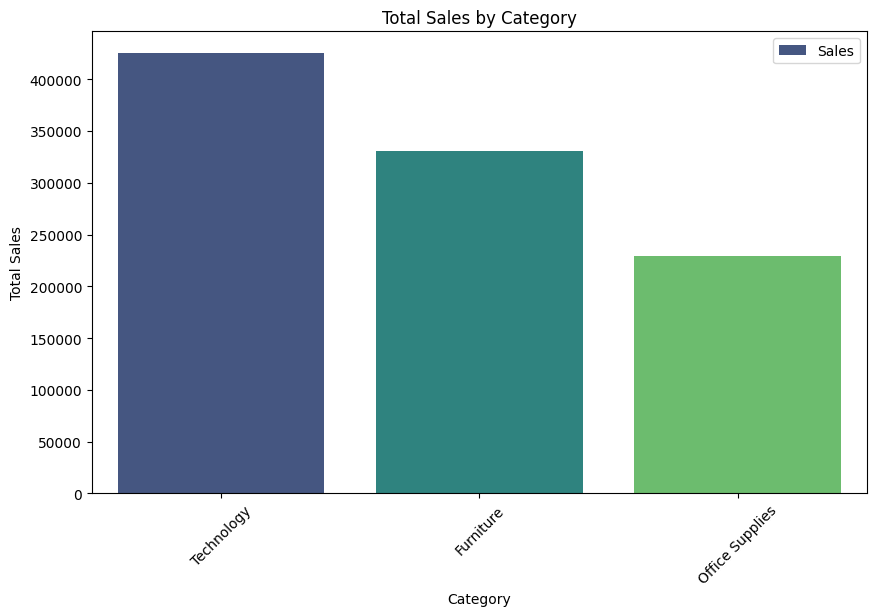

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=df, estimator=sum, ci=None, palette='plasma')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=df, estimator=sum, ci=None, palette='plasma')


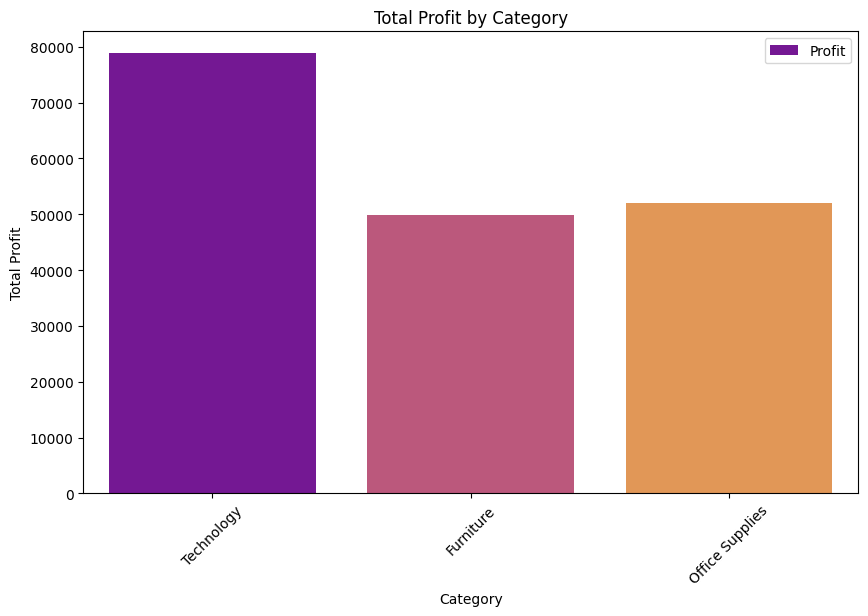

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='magma')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='magma')


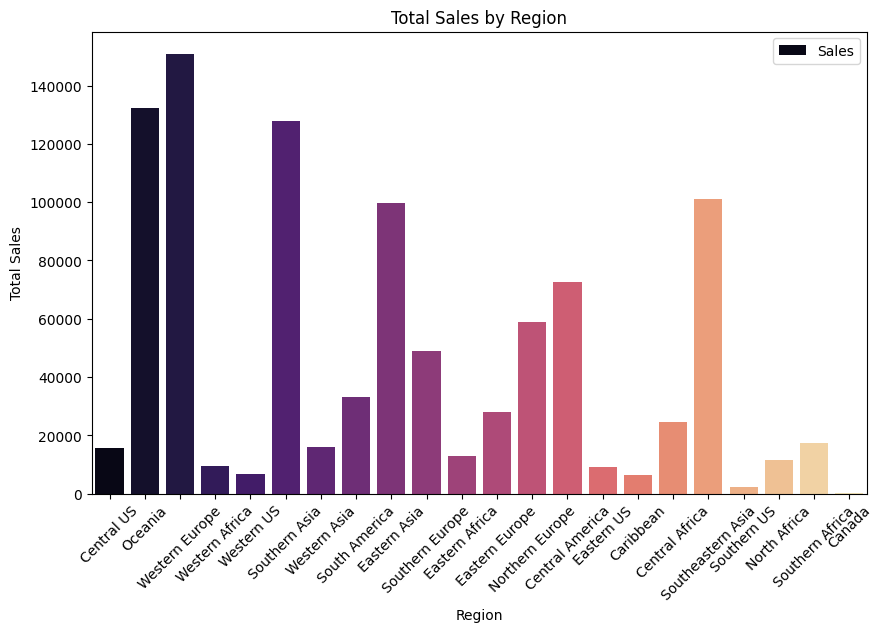

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='coolwarm')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='coolwarm')


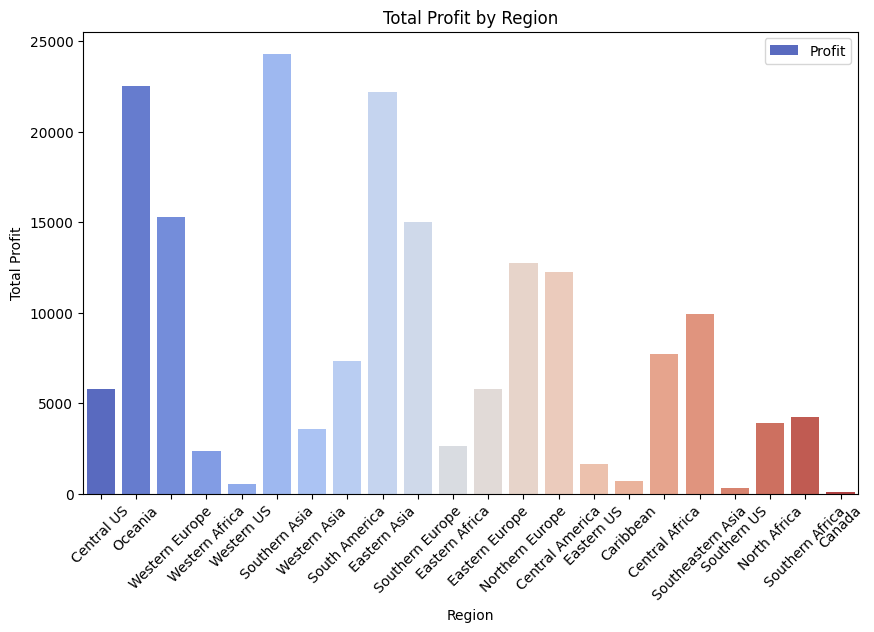

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ship Mode', y='Sales', data=df, estimator=sum, ci=None, palette='cubehelix')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Sales', data=df, estimator=sum, ci=None, palette='cubehelix')


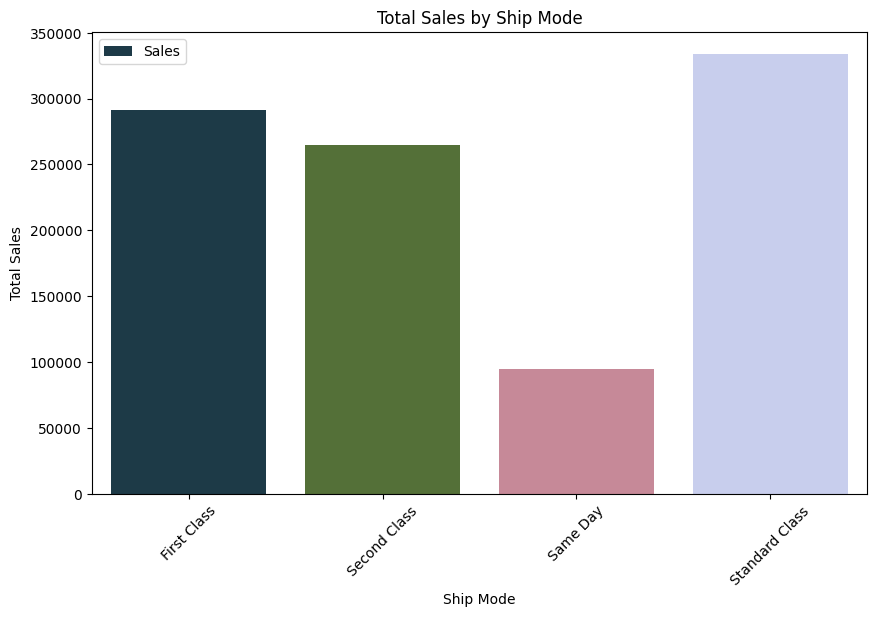

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ship Mode', y='Profit', data=df, estimator=sum, ci=None, palette='spring')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Profit', data=df, estimator=sum, ci=None, palette='spring')


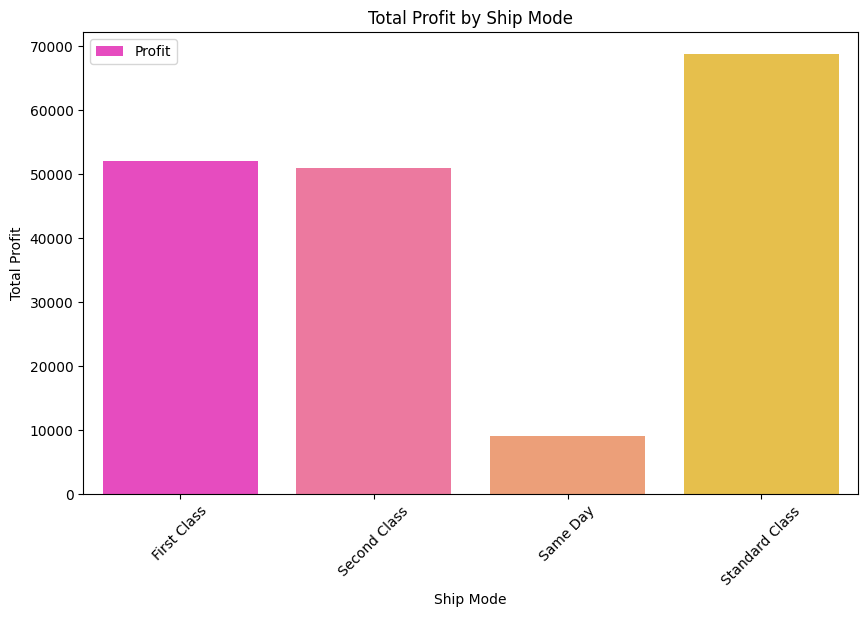

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Order Priority', y='Sales', data=df, estimator=sum, ci=None, palette='autumn')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Priority', y='Sales', data=df, estimator=sum, ci=None, palette='autumn')


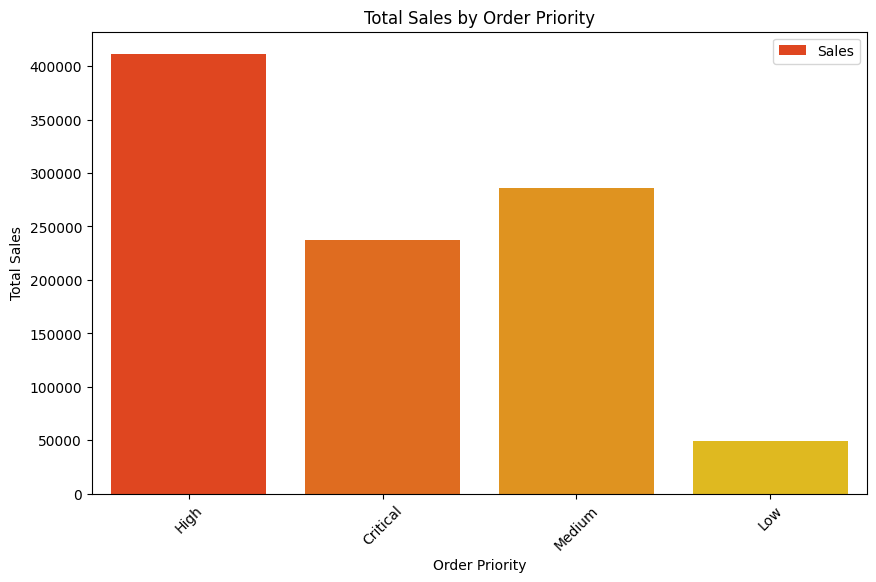

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:82: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Order Priority', y='Profit', data=df, estimator=sum, ci=None, palette='winter')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_67220/95329272.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Priority', y='Profit', data=df, estimator=sum, ci=None, palette='winter')


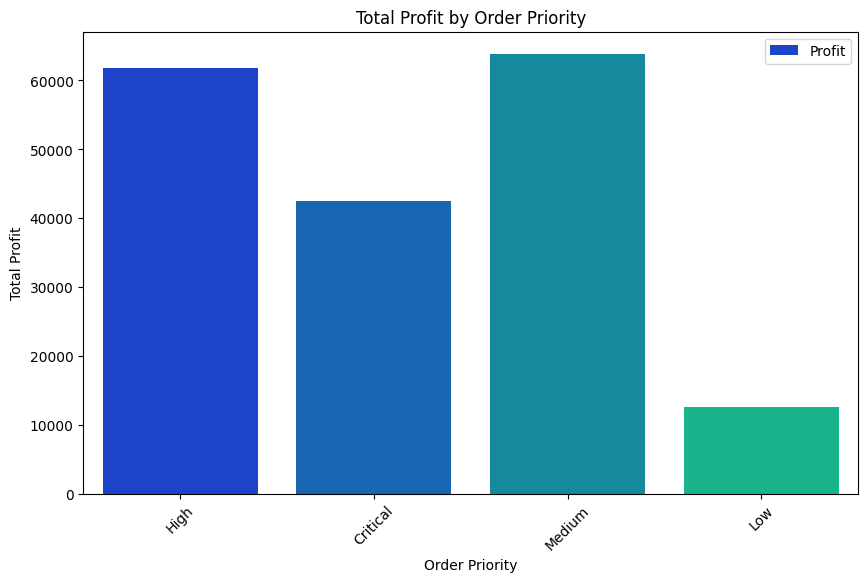

Based on the provided dataset, here are some key insights and observations:

1. **Order Information**:
   - The dataset contains various attributes related to orders, including `Order ID`, `Order Date`, `Ship Date`, and `Ship Mode`. This information can be used to analyze order processing times and shipping efficiency.

2. **Customer Segmentation**:
   - Customers are categorized into segments: `Consumer`, `Corporate`, and `Home Office`. This segmentation can help in understanding purchasing behavior and tailoring marketing strategies.

3. **Geographic Distribution**:
   - The dataset includes `Postal Code` and `City`, which can be used to analyze sales distribution across different regions. Notably, some entries have missing postal codes, which may affect geographic analysis.

4. **Product Categories**:
   - Products are classified into `Category` and `Sub-Category`, with examples including `Technology` (e.g., Phones) and `Furniture` (e.g., Chairs). This classification can help identi

In [15]:
file_path = '/Users/mahtabsyed/Library/Mobile Documents/com~apple~CloudDocs/All Family Storage/1 - Career - Mahtab/UST/Data and AI/AI Presentation/Data/Smaller Global Superstore Orders 2016.xlsx'

# Can you load this xls in this file path in a Pandas df. And could you draw matplotlob plots as many as you can to visualize the data. You can only use the fields which makse sense to draw the plots. And Can you add Labels to the plots and update the code. Make the chart colorful and add legends to the plots

# Can you load this xls in this file path in a Pandas df. And take just 5 rows from top and send to openai LLM to get insights. Just summarize the key insighst on the data

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Plot 1: Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.legend(['Sales'])
plt.xticks(rotation=45)
plt.show()

# Plot 2: Profit by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=df, estimator=sum, ci=None, palette='plasma')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.legend(['Profit'])
plt.xticks(rotation=45)
plt.show()

# Plot 3: Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='magma')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(['Sales'])
plt.xticks(rotation=45)
plt.show()

# Plot 4: Profit by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='coolwarm')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.legend(['Profit'])
plt.xticks(rotation=45)
plt.show()

# Plot 5: Sales by Ship Mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Sales', data=df, estimator=sum, ci=None, palette='cubehelix')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.legend(['Sales'])
plt.xticks(rotation=45)
plt.show()

# Plot 6: Profit by Ship Mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Profit', data=df, estimator=sum, ci=None, palette='spring')
plt.title('Total Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')
plt.legend(['Profit'])
plt.xticks(rotation=45)
plt.show()

# Plot 7: Sales by Order Priority
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Priority', y='Sales', data=df, estimator=sum, ci=None, palette='autumn')
plt.title('Total Sales by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Sales')
plt.legend(['Sales'])
plt.xticks(rotation=45)
plt.show()

# Plot 8: Profit by Order Priority
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Priority', y='Profit', data=df, estimator=sum, ci=None, palette='winter')
plt.title('Total Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Profit')
plt.legend(['Profit'])
plt.xticks(rotation=45)
plt.show()

# Take the first 5 rows of the dataframe
df_sample = df.head()

# Prepare the prompt for OpenAI LLM
prompt = f"Here are the first 5 rows of the dataset:\n{df_sample}\n\nPlease summarize the key insights on the data."

# Get insights from OpenAI LLM
insights = get_completion(prompt)

# Print the insights
print(insights)

In [ ]:
file_path = '/Users/mahtabsyed/Library/Mobile Documents/com~apple~CloudDocs/All Family Storage/1 - Career - Mahtab/UST/Data and AI/AI Presentation/Data/Smaller Global Superstore Orders 2016.xlsx'

# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Take the first 5 rows of the dataframe
df_sample = df.head()

# Prepare the prompt for OpenAI LLM
prompt = f"Here are the first 5 rows of the dataset:\n{df_sample}\n\nPlease summarize the key insights on the data."

# Get insights from OpenAI LLM
insights = get_completion(prompt)

# Print the insights
print(insights)

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')


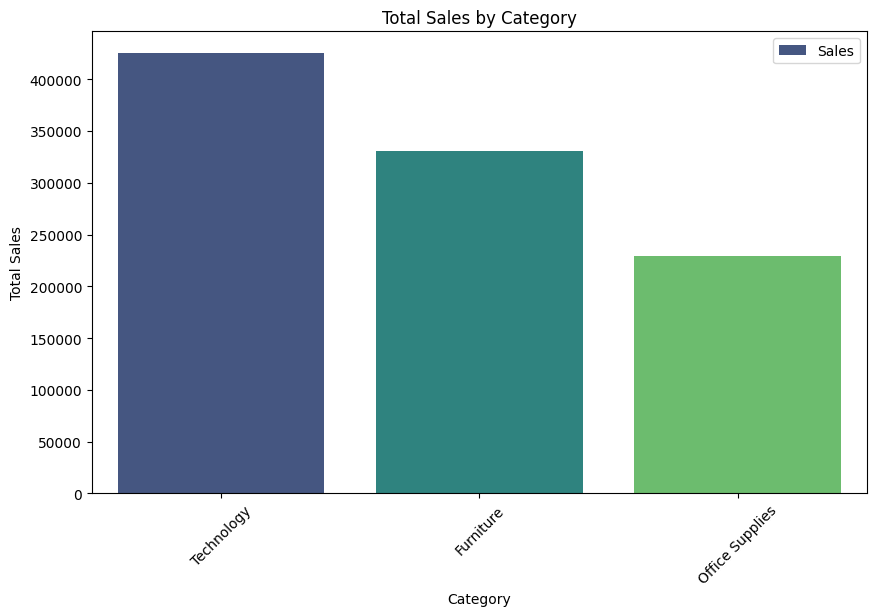

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=df, estimator=sum, ci=None, palette='plasma')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=df, estimator=sum, ci=None, palette='plasma')


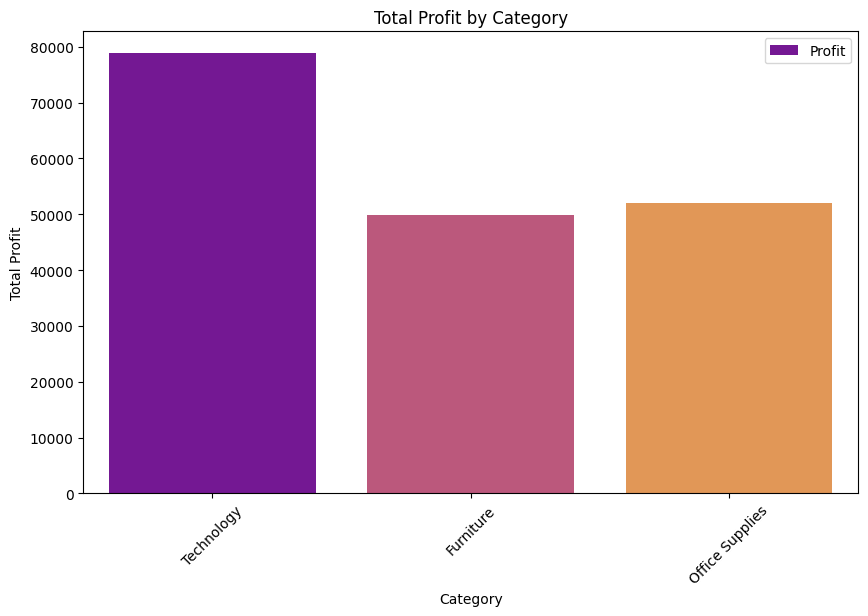

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='magma')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='magma')


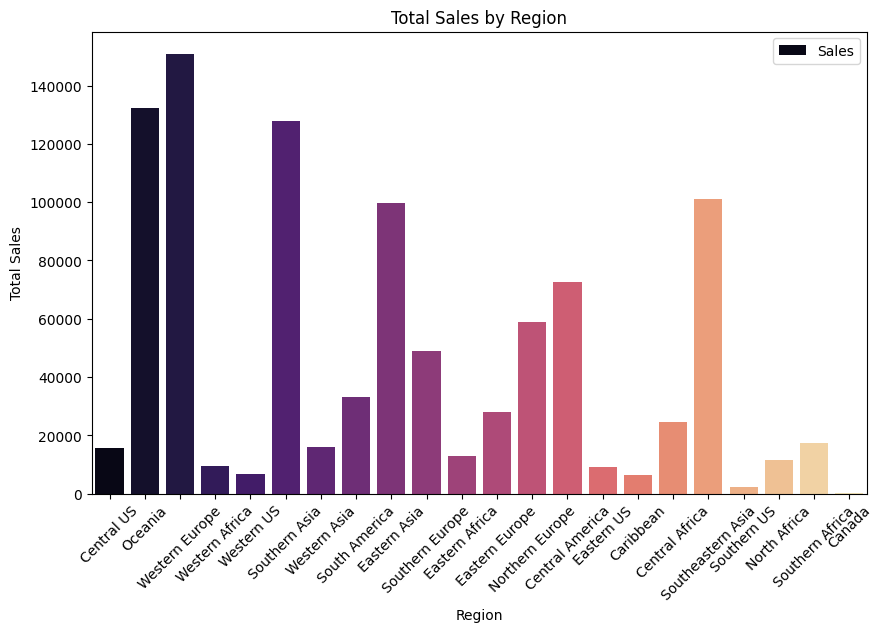

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='coolwarm')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='coolwarm')


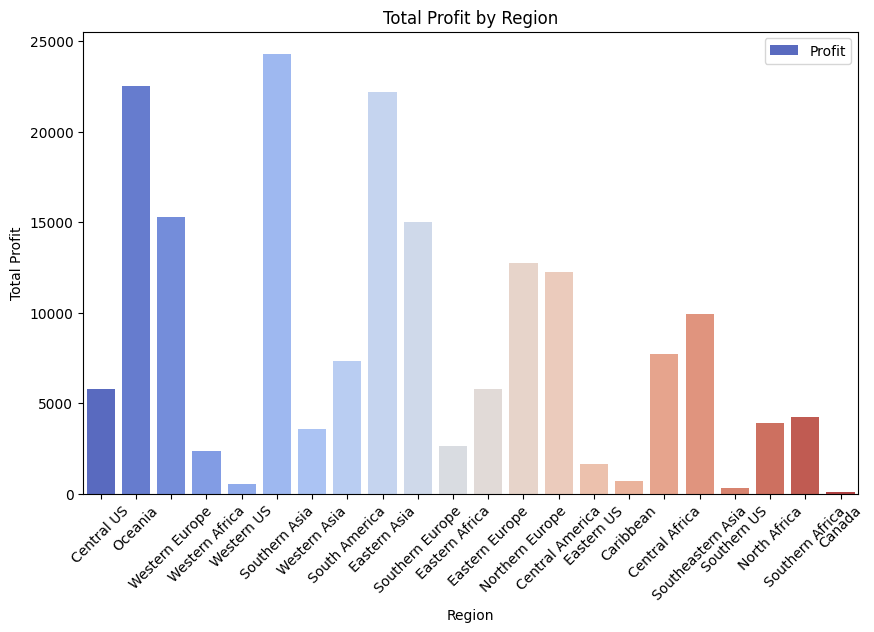

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ship Mode', y='Sales', data=df, estimator=sum, ci=None, palette='cubehelix')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Sales', data=df, estimator=sum, ci=None, palette='cubehelix')


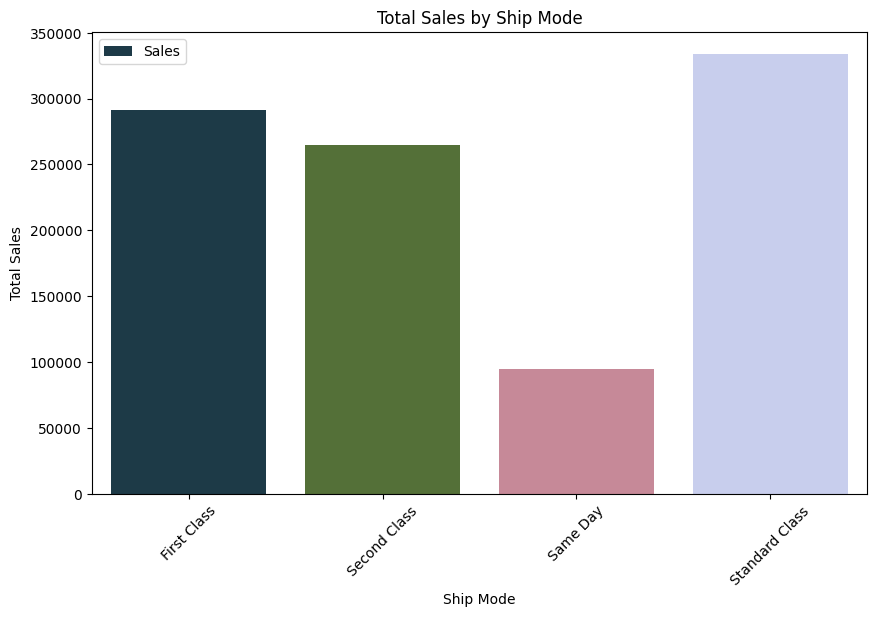

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ship Mode', y='Profit', data=df, estimator=sum, ci=None, palette='spring')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ship Mode', y='Profit', data=df, estimator=sum, ci=None, palette='spring')


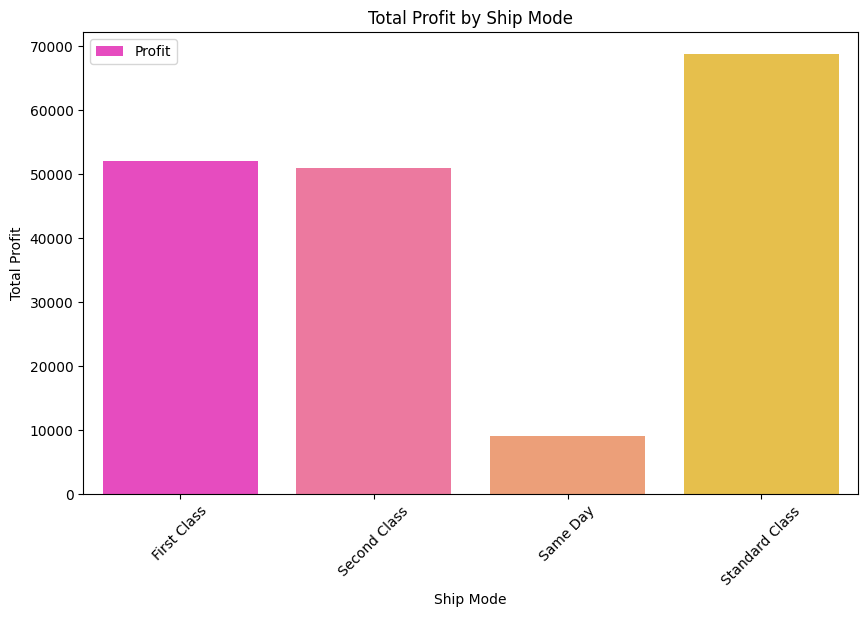

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:76: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Order Priority', y='Sales', data=df, estimator=sum, ci=None, palette='autumn')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Priority', y='Sales', data=df, estimator=sum, ci=None, palette='autumn')


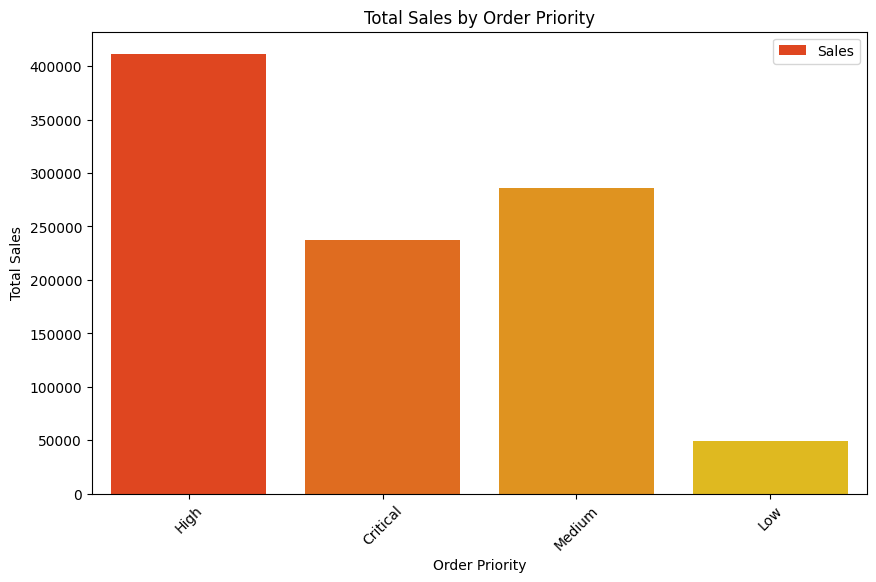

/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:86: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Order Priority', y='Profit', data=df, estimator=sum, ci=None, palette='winter')
/var/folders/bq/z1j1m8m17dx3szw_ngp40tyr0000gn/T/ipykernel_37505/242707369.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Priority', y='Profit', data=df, estimator=sum, ci=None, palette='winter')


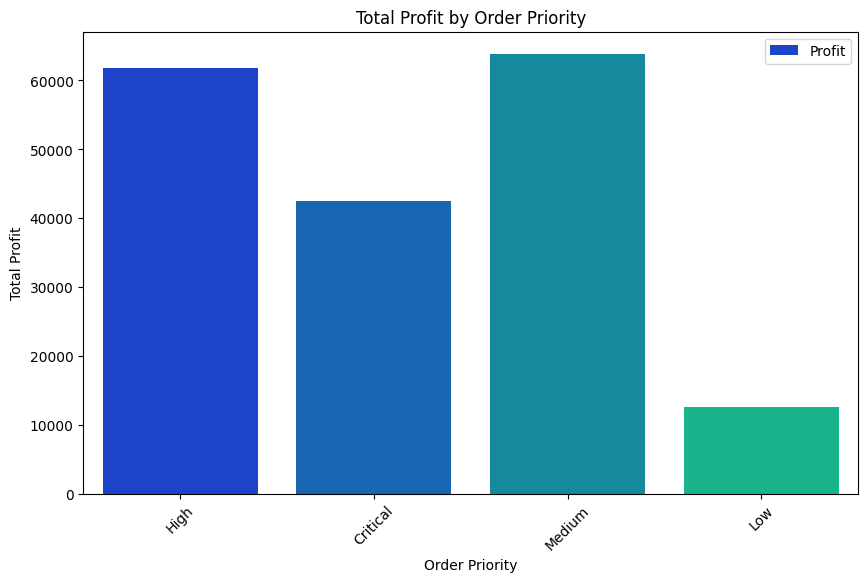

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/Users/mahtabsyed/Library/Mobile Documents/com~apple~CloudDocs/All Family Storage/1 - Career - Mahtab/UST/Data and AI/AI Presentation/Data/Smaller Global Superstore Orders 2016.xlsx'



# Load the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Plot 1: Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.legend(['Sales'])
plt.xticks(rotation=45)
plt.show()

# Plot 2: Profit by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=df, estimator=sum, ci=None, palette='plasma')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.legend(['Profit'])
plt.xticks(rotation=45)
plt.show()

# Plot 3: Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum, ci=None, palette='magma')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(['Sales'])
plt.xticks(rotation=45)
plt.show()

# Plot 4: Profit by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None, palette='coolwarm')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.legend(['Profit'])
plt.xticks(rotation=45)
plt.show()

# Plot 5: Sales by Ship Mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Sales', data=df, estimator=sum, ci=None, palette='cubehelix')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.legend(['Sales'])
plt.xticks(rotation=45)
plt.show()

# Plot 6: Profit by Ship Mode
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Profit', data=df, estimator=sum, ci=None, palette='spring')
plt.title('Total Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')
plt.legend(['Profit'])
plt.xticks(rotation=45)
plt.show()

# Plot 7: Sales by Order Priority
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Priority', y='Sales', data=df, estimator=sum, ci=None, palette='autumn')
plt.title('Total Sales by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Sales')
plt.legend(['Sales'])
plt.xticks(rotation=45)
plt.show()

# Plot 8: Profit by Order Priority
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Priority', y='Profit', data=df, estimator=sum, ci=None, palette='winter')
plt.title('Total Profit by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Profit')
plt.legend(['Profit'])
plt.xticks(rotation=45)
plt.show()

# 5 - Machine Learning
### An example of learning with past data to predict future 
- https://www.linkedin.com/pulse/machine-learning-blog-2-mahtab-syed/
- https://github.com/mahtabsyed/Machine-Learning-Heart-Disease-Classification/blob/master/end-to-end-heart-disease-classification.ipynb
